
**Step 1 : Reading and Understanding the input data**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.1 : Importing the required libraries

In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

1.2 : Reading the csv input file

In [8]:
input_load=pd.read_csv("/content/drive/MyDrive/DS study/Colab Notebooks/ML Case Study_UpGrad/Leads.csv")

In [9]:
# Let's see the head of our master dataset
input_load.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


1.3 : Inspecting the Dataframe

In [10]:
# Let's check the dimensions of the dataframe
input_load.shape

(9240, 37)

In [11]:
# let's look at the statistical aspects of the dataframe
input_load.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
# Let's see the type of each column
input_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Step 2 : Data Cleaning**

2.1 : Dropping the columns having missing data more than 35 %


In [13]:
#Assumption --> Threshold perecentage of missing data - 35 %

In [14]:
#Adressing missing values columns
for column in input_load.columns:
  missing_value_precentage=(pd.isnull(input_load[(column)]).sum())*100/(len(input_load.index))
  if missing_value_precentage>35.0:
    input_load.drop(column, axis=1, inplace=True)
  print(column, ":",missing_value_precentage)

Prospect ID : 0.0
Lead Number : 0.0
Lead Origin : 0.0
Lead Source : 0.38961038961038963
Do Not Email : 0.0
Do Not Call : 0.0
Converted : 0.0
TotalVisits : 1.4826839826839826
Total Time Spent on Website : 0.0
Page Views Per Visit : 1.4826839826839826
Last Activity : 1.1147186147186148
Country : 26.634199134199132
Specialization : 15.562770562770563
How did you hear about X Education : 23.885281385281385
What is your current occupation : 29.11255411255411
What matters most to you in choosing a course : 29.318181818181817
Search : 0.0
Magazine : 0.0
Newspaper Article : 0.0
X Education Forums : 0.0
Newspaper : 0.0
Digital Advertisement : 0.0
Through Recommendations : 0.0
Receive More Updates About Our Courses : 0.0
Tags : 36.28787878787879
Lead Quality : 51.59090909090909
Update me on Supply Chain Content : 0.0
Get updates on DM Content : 0.0
Lead Profile : 29.318181818181817
City : 15.367965367965368
Asymmetrique Activity Index : 45.64935064935065
Asymmetrique Profile Index : 45.649350649

In [15]:
# Let's see the type of each column
input_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
# Dropping all the columns having no use in analysis - based on observations
input_load.drop(["Prospect ID", "Lead Number", "Newspaper Article"], axis = 1, inplace = True)

In [17]:
# Let's see the type of each column
input_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [18]:
#Checking duplicate rows 
input_load.duplicated().sum()

1687

In [19]:
# Drop all the duplicated rows and will keep the first occurance inplace.
input_load.drop_duplicates(inplace = True)

In [20]:
# Let's check the dimensions of the dataframe
input_load.shape

(7553, 28)

**Step 3 : Data Preparation**

3.1 : Checking for Missing Values - Dropping and Inputing Them


In [21]:
input_load.isnull().sum()

Lead Origin                                         0
Lead Source                                        23
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       136
Total Time Spent on Website                         0
Page Views Per Visit                              136
Last Activity                                     102
Country                                           779
Specialization                                    651
How did you hear about X Education               1419
What is your current occupation                  1902
What matters most to you in choosing a course    1921
Search                                              0
Magazine                                            0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [22]:
# Checking the percentage of missing values
round(100*(input_load.isnull().sum()/len(input_load.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.30
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.80
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.80
Last Activity                                     1.35
Country                                          10.31
Specialization                                    8.62
How did you hear about X Education               18.79
What is your current occupation                  25.18
What matters most to you in choosing a course    25.43
Search                                            0.00
Magazine                                          0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [23]:
#Lead Source column has missing data of only 0.30% - Lead source,  which seems insginificant value, hence it can be dropped off.
input_load.dropna(how='any', subset=['Lead Source'], inplace=True)

In [24]:
# Let's check the dimensions of the dataframe obtained after perfoming above set of activities
input_load.shape

(7530, 28)

In [25]:
#Missing value imputation on TotalVisits column
input_load['TotalVisits'].value_counts()

2.0      1676
3.0      1305
4.0      1120
5.0       783
0.0       493
6.0       466
1.0       394
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
input_load.TotalVisits.mode()

0    2.0
dtype: float64

In [27]:
#Missing values in column TotalVisits can be imputed based upon the mode value as calculated above;
input_load['TotalVisits'].fillna(input_load['TotalVisits'].mode()[0], inplace = True)

In [28]:
#Missing value imputation on Page Views Per Visit column
input_load['Page Views Per Visit'].value_counts()

2.00    1791
3.00    1195
4.00     896
1.00     650
5.00     517
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [29]:
input_load['Page Views Per Visit'].mode()

0    2.0
dtype: float64

In [30]:
#Missing values in column Page Views Per Visit can be imputed based upon the mode value as calculated above;
input_load['Page Views Per Visit'].fillna(input_load['Page Views Per Visit'].mode()[0], inplace = True)

In [31]:
#Missing value imputation on Page Views Per Visit column
input_load['Last Activity'].value_counts()

Email Opened                    2890
SMS Sent                        2287
Page Visited on Website          635
Converted to Lead                426
Olark Chat Conversation          386
Email Bounced                    286
Email Link Clicked               205
Form Submitted on Website        116
Unreachable                       92
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 8
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
input_load['Last Activity'].mode()
#Missing values in column Page Views Per Visit can be imputed based upon the mode value as calculated above;
input_load['Last Activity'].fillna(input_load['Last Activity'].mode()[0], inplace = True)

In [33]:
#Missing data imputation for categorical columns;
#Missing values in column Country can be imputed based upon the mode value;
input_load['Country'].fillna(input_load['Country'].mode()[0], inplace = True)

#Missing values in column Specialization can be imputed based upon the mode value;
input_load['Specialization'].fillna(input_load['Specialization'].mode()[0], inplace = True)

#Missing values in column How did you hear about X Education can be imputed based upon the mode value;
input_load['How did you hear about X Education'].fillna(input_load['How did you hear about X Education'].mode()[0], inplace = True)

#Missing values in column What is your current occupation can be imputed based upon the mode value;
input_load['What is your current occupation'].fillna(input_load['What is your current occupation'].mode()[0], inplace = True)

#Missing values in column What matters most to you in choosing a course can be imputed based upon the mode value;
input_load['What matters most to you in choosing a course'].fillna(input_load['What matters most to you in choosing a course'].mode()[0], inplace = True)

#Missing values in column Lead Profile can be imputed based upon the mode value;
input_load['Lead Profile'].fillna(input_load['Lead Profile'].mode()[0], inplace = True)

#Missing values in column City can be imputed based upon the mode value;
input_load['City'].fillna(input_load['City'].mode()[0], inplace = True)

In [34]:
# Checking the percentage of missing values
round(100*(input_load.isnull().sum()/len(input_load.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

3.2 Handling columns having "select" in value field because it is as good as missing value



In [35]:
#Missing value imputation on Page Views Per Visit column
input_load['Specialization'].value_counts()

Select                               1829
Finance Management                    944
Human Resource Management             817
Marketing Management                  785
Operations Management                 489
Business Administration               396
IT Projects Management                363
Supply Chain Management               347
Banking, Investment And Insurance     327
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 157
Hospitality Management                113
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
input_load['How did you hear about X Education'].value_counts()

Select                   5542
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [37]:
input_load['Lead Profile'].value_counts()


Select                         5393
Potential Lead                 1427
Other Leads                     471
Student of SomeSchool           195
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
input_load['City'].value_counts()

Mumbai                         3823
Select                         1388
Thane & Outskirts               733
Other Cities                    682
Other Cities of Maharashtra     451
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
#Percentage of value 'Select' in column "Specialization"
input_load['Specialization'].value_counts()[0]/input_load.shape[0]*100

24.289508632138116

In [40]:
#looking at the data of column "Specialization", it's observed that 24% data has 'Select' value and rest of the values in comlumn having no major subsequent difference. 
#Therefore it is recommended to drop column.
input_load.drop(["Specialization"], axis = 1, inplace = True)

In [41]:
#Percentage of value 'Select' in column "How did you hear about X Education"
input_load['How did you hear about X Education'].value_counts()[0]/input_load.shape[0]*100

73.59893758300132

In [42]:
#Percentage of value 'Select' in column "Lead Profile"
input_load['Lead Profile'].value_counts()[0]/input_load.shape[0]*100

71.62018592297477

In [43]:
#Percentage of value 'Select' in column "City"
input_load['City'].value_counts()[0]/input_load.shape[0]*100

50.77025232403718

In [44]:
#looking at the data of columns "How did you hear about X Education", "Lead Profile", and "City", it has more than 35% of data having value 'Select'. Therefore it is recommended to drop these columns
input_load.drop(["How did you hear about X Education", "Lead Profile", "City"], axis = 1, inplace = True)

In [45]:
# Let's check the dimensions of the dataframe
input_load.shape

(7530, 24)

In [46]:
# Dropping the columns based business requirement
input_load.drop(['Lead Origin', 'What is your current occupation','What matters most to you in choosing a course', 'Last Activity', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Last Notable Activity'], axis = 1, inplace = True)

In [47]:
#checking perecentage of rows retained in data cleaning process
input_load.shape[0]*100/9240

81.49350649350649

3.3 Create dummies for all categorical variables - Converting some binary variables (Yes/No) to 0/1

In [48]:
# List of variables to map - I

varlist1 =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map1(x):
    return x.map({'Yes': 0, "No": 1})

# Applying the function to the housing list
input_load[varlist1] = input_load[varlist1].apply(binary_map1)

In [49]:
# List of variables to map - II

varlist2 =  ['Search', 'Magazine', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map2(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
input_load[varlist2] = input_load[varlist2].apply(binary_map2)

3.4 Create dummy variables for categorical columns

In [50]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(input_load[['Lead Source', 'Country']], drop_first=True)

# Adding the results to the master dataframe
input_load = pd.concat([input_load, dummy1], axis=1)

In [51]:
# We have created dummies for the below variables, so we can drop them
input_load = input_load.drop(['Lead Source', 'Country'], axis=1)

In [52]:
# Let's check the dimensions of the dataframe
input_load.shape

(7530, 70)

In [53]:
# Checking the percentage of missing values
round(100*(input_load.isnull().sum()/len(input_load.index)), 2)

Do Not Email                    0.0
Do Not Call                     0.0
Converted                       0.0
TotalVisits                     0.0
Total Time Spent on Website     0.0
                               ... 
Country_United Arab Emirates    0.0
Country_United Kingdom          0.0
Country_United States           0.0
Country_Vietnam                 0.0
Country_unknown                 0.0
Length: 70, dtype: float64

**Step 4: Test-Train Split**

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
# Putting feature variable to X
X = input_load.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,1,1,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Putting response variable to y
Y = input_load['Converted']

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 1171 to 6850
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            5271 non-null   int64  
 1   Do Not Call                             5271 non-null   int64  
 2   TotalVisits                             5271 non-null   float64
 3   Total Time Spent on Website             5271 non-null   int64  
 4   Page Views Per Visit                    5271 non-null   float64
 5   Search                                  5271 non-null   int64  
 6   Magazine                                5271 non-null   int64  
 7   X Education Forums                      5271 non-null   int64  
 8   Newspaper                               5271 non-null   int64  
 9   Digital Advertisement                   5271 non-null   int64  
 10  Through Recommendations                 5271 non-null   i

**Step 5: Scaling**

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [62]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,X Education Forums,Newspaper,Digital Advertisement,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
1171,1,1,0.150695,1.705432,1.072972,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4394,1,1,0.732324,-0.462745,2.604670,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3600,1,1,0.344571,-0.938730,-0.867179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5324,1,1,-0.237058,-0.802993,0.051840,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2367,1,1,3.058843,1.242116,-0.346401,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,-0.237058,0.963402,0.051840,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4702,1,1,-0.237058,0.699167,0.051840,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7254,1,1,-0.430935,-0.605721,-0.458726,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8531,1,1,-0.430935,-0.650967,-0.458726,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 1171 to 6850
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            5271 non-null   int64  
 1   Do Not Call                             5271 non-null   int64  
 2   TotalVisits                             5271 non-null   float64
 3   Total Time Spent on Website             5271 non-null   float64
 4   Page Views Per Visit                    5271 non-null   float64
 5   Search                                  5271 non-null   int64  
 6   Magazine                                5271 non-null   int64  
 7   X Education Forums                      5271 non-null   int64  
 8   Newspaper                               5271 non-null   int64  
 9   Digital Advertisement                   5271 non-null   int64  
 10  Through Recommendations                 5271 non-null   i

In [64]:
X_train.shape

(5271, 69)

*Looking at Correlations*

In [65]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

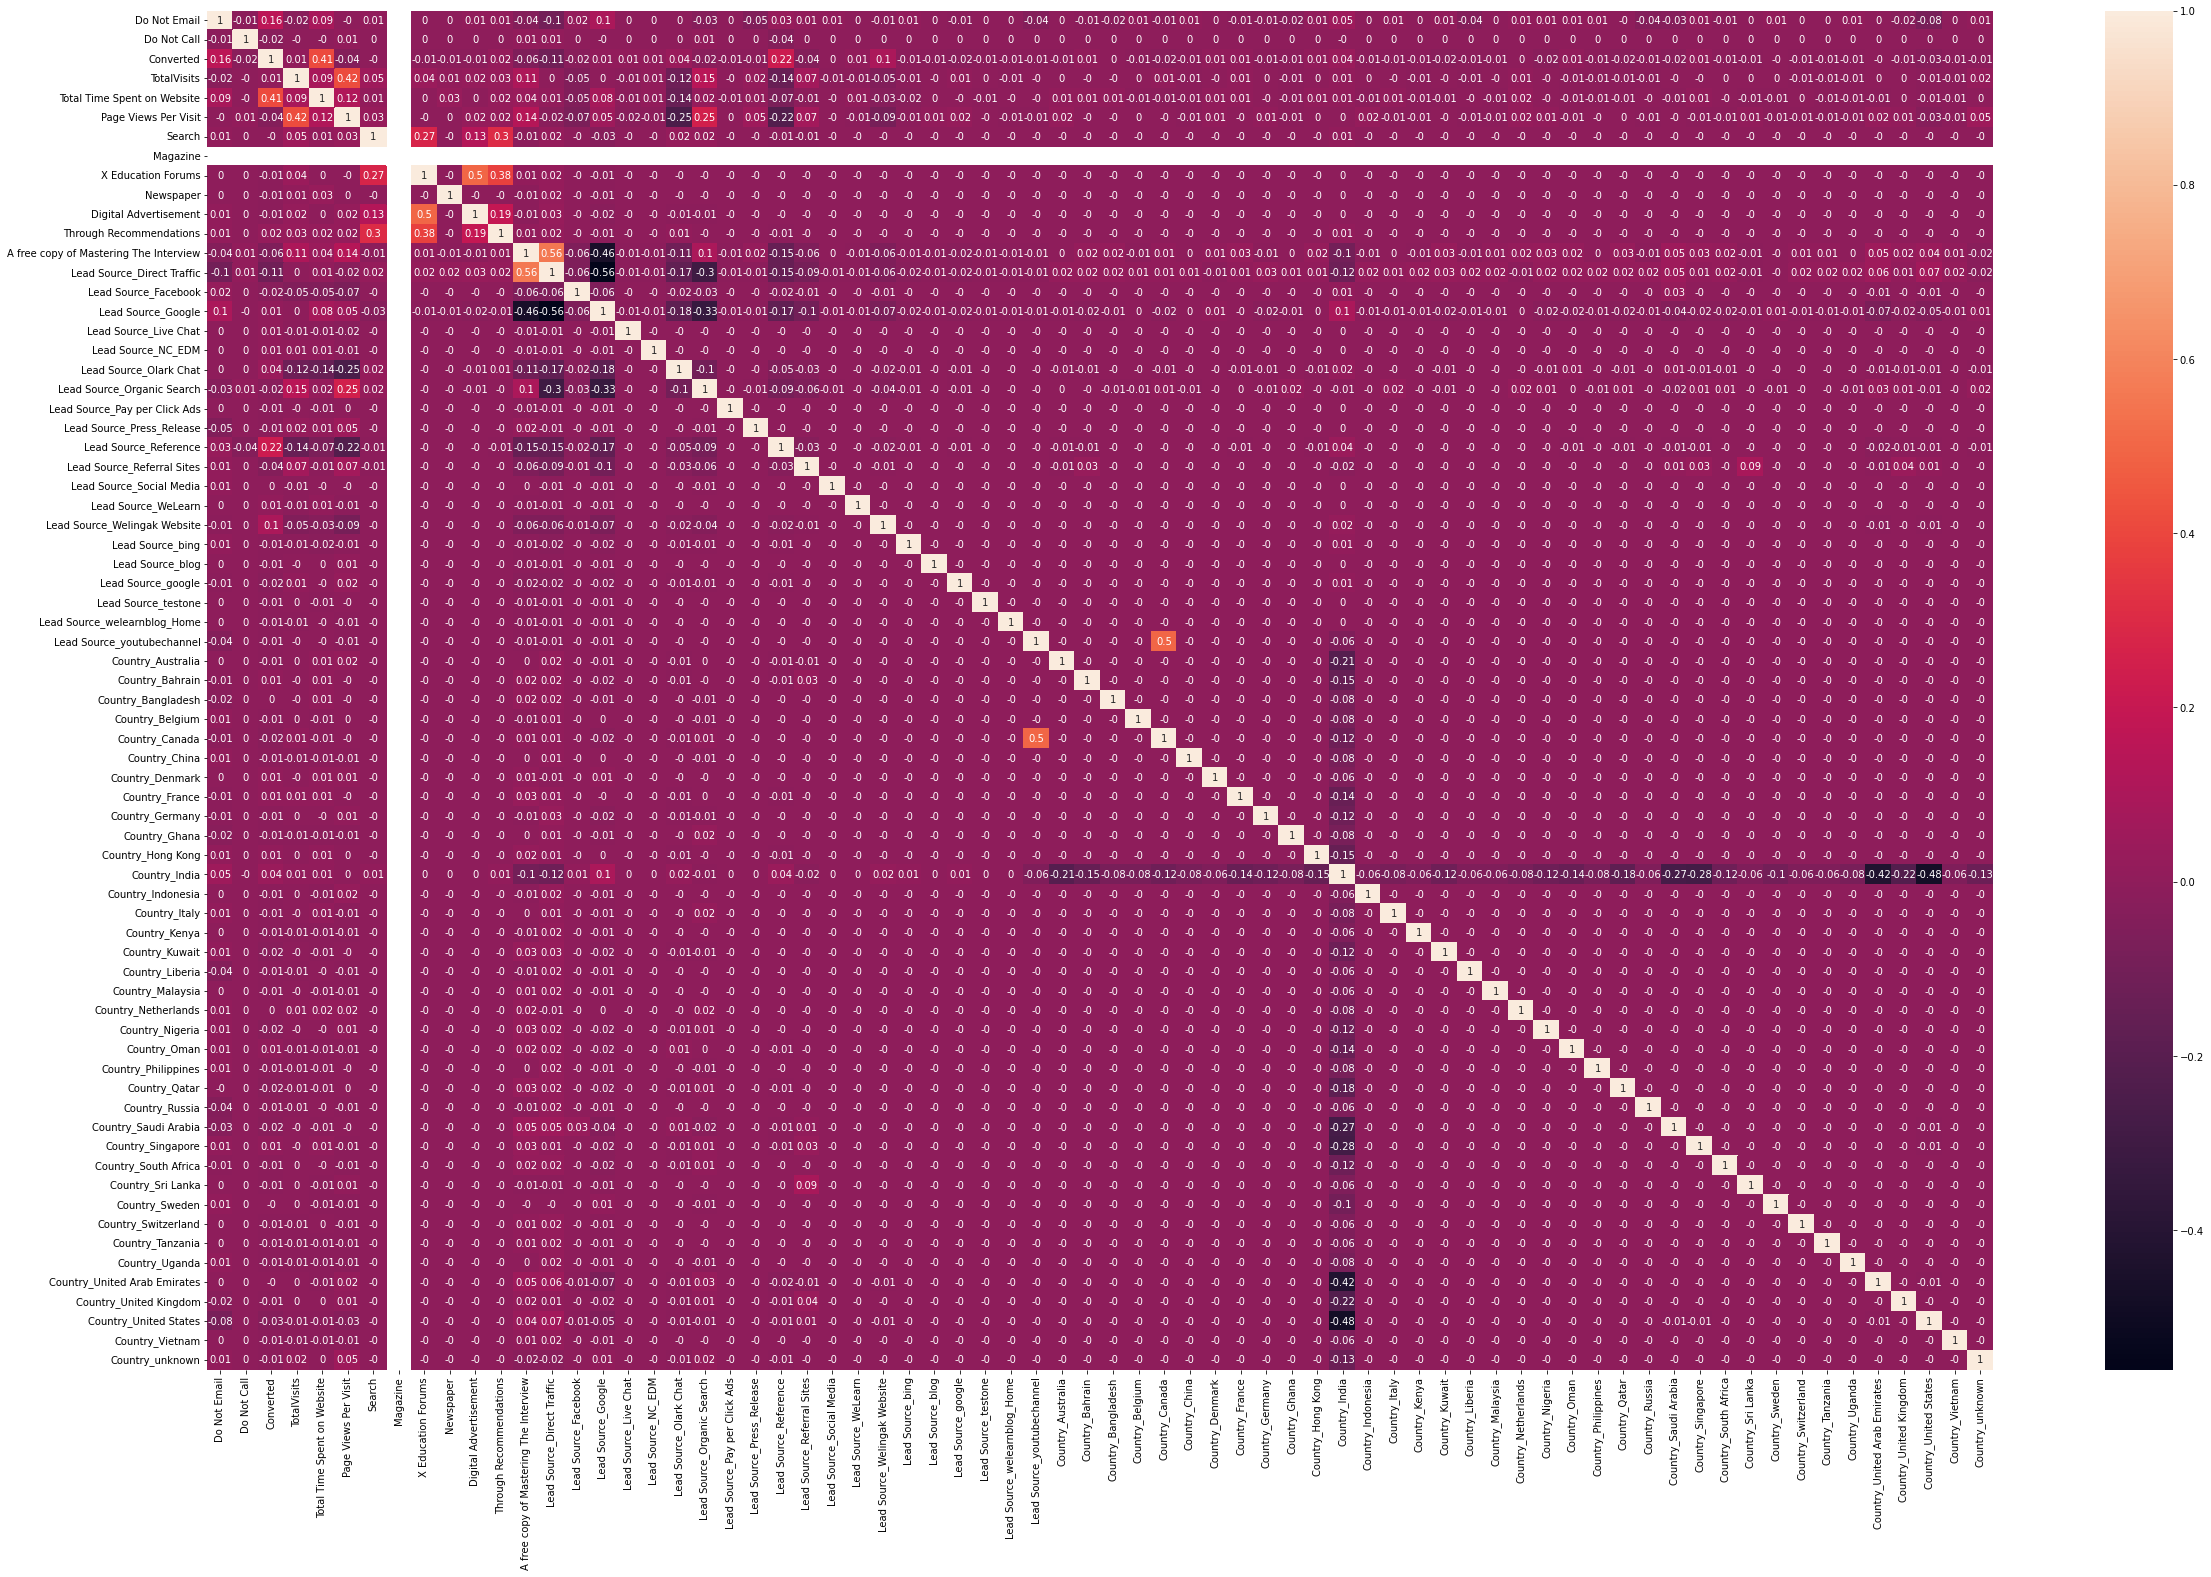

In [66]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,25))        # Size of the figure
sns.heatmap(round(input_load.corr(), 2),annot = True)
plt.show()

**Step 6: Model Building**

**Step 6.1: Building First Model**

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm_1 = sm.GLS(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

In [69]:
logm_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.273
Model:                            GLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     31.55
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          4.23e-308
Time:                        16:55:43   Log-Likelihood:                -2887.3
No. Observations:                5271   AIC:                             5901.
Df Residuals:                    5208   BIC:                             6315.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Do Not Email                               0.1934      0.021      9.125      0.000       0.152       0.235
Do Not Call                                0.8340      0.472      1.769      0.077      -0.090       1.758
TotalVisits                                0.0244      0.006      3.857      0.000       0.012       0.037
Total Time Spent on Website                0.2081      0.006     34.931      0.000       0.196       0.220
Page Views Per Visit                      -0.0027      0.007     -0.391      0.696      -0.016       0.011
Search                                    -0.3004      0.164     -1.836      0.066      -0.621       0.020
Magazine                                 -4.9e-15   3.01e-15     -1.631      0.103   -1.08e-14    9.91e-16
X Education Forums                        -0.6571      0.555     -1.183      0.237      -1.746       0.432
Newspaper                               7.461e-16    8.3e-16      0.899      0.369   -8.81e-16    2.37e-15
Digital Advertisement                     -0.0430      0.244     -0.176      0.860      -0.521       0.435
Through Recommendations                    0.4913      0.249      1.970      0.049       0.003       0.980
A free copy of Mastering The Interview    -0.0039      0.016     -0.251      0.802      -0.034       0.027
Lead Source_Direct Traffic                -0.4247      0.211     -2.012      0.044      -0.839      -0.011
Lead Source_Facebook                      -0.3066      0.222     -1.379      0.168      -0.742       0.129
Lead Source_Google                        -0.3925      0.211     -1.862      0.063      -0.806       0.021
Lead Source_Live Chat                      0.4601      0.471      0.977      0.328      -0.463       1.383
Lead Source_NC_EDM                         0.0787      0.471      0.167      0.867      -0.844       1.001
Lead Source_Olark Chat                    -0.1338      0.212     -0.631      0.528      -0.550       0.282
Lead Source_Organic Search                -0.3933      0.211     -1.861      0.063      -0.808       0.021
Lead Source_Pay per Click Ads             -0.5970      0.471     -1.268      0.205      -1.520       0.326
Lead Source_Press_Release                 -0.6759      0.366     -1.845      0.065      -1.394       0.042
Lead Source_Reference                      0.2375      0.212      1.119      0.263      -0.179       0.654
Lead Source_Referral Sites                -0.4998      0.215     -2.320      0.020      -0.922      -0.077
Lead Source_Social Media                  -0.2546      0.365     -0.698      0.485      -0.970       0.460
Lead Source_WeLearn                        0.0074      0.471      0.016      0.987      -0.915       0.930
Lead Source_Welingak Website               0.3014      0.222      1.356      0.175     

**6.2 : Feature Selection Using RFE**

In [70]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
from sklearn.feature_selection import RFE

In [71]:
lm.fit(X_train, Y_train)
rfe = RFE(lm, n_features_to_select=10)
#rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, Y_train)

In [72]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 51),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 54),
 ('Search', True, 1),
 ('Magazine', False, 55),
 ('X Education Forums', False, 22),
 ('Newspaper', False, 60),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', False, 2),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 10),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 52),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', 

In [74]:
col=X_train.columns[rfe.support_]

In [75]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Magazine',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Ghana',
       'Country_Hong Kong', 'Country_India', 'Country_Indonesia',
       'Country_

**6.3 : Assessing the model with StatsModels**

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm_2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5271
Model:                            GLM   Df Residuals:                     5260
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2769.9
Date:                Tue, 18 Oct 2022   Deviance:                       5539.8
Time:                        16:55:51   Pearson chi2:                 5.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.0181      0.152    -13.291      0.000      -2.316      -1.720
Do Not Email                     1.4346      0.155      9.280      0.000       1.132       1.738
Total Time Spent on Website      1.0551      0.036     29.389      0.000       0.985       1.126
Search                          -1.4991      1.022     -1.467      0.142      -3.502       0.504
Lead Source_Olark Chat           1.4199      0.142      9.970      0.000       1.141       1.699
Lead Source_Reference            3.8359      0.242     15.882      0.000       3.363       4.309
Lead Source_Welingak Website     4.6227      0.756      6.114      0.000       3.141       6.105
Country_Kuwait                 -22.3617   2.32e+04     -0.001      0.999   -4.55e+04    4.54e+04
Country_Nigeria                -22.0267   2.61e+04     -0.001      0.999   -5.12e+04    5.12e+04
Country_Qatar                   -1.7743      1.258     -1.410      0.158      -4.240       0.691
Country_Saudi Arabia            -1.8080      0.937     -1.929      0.054      -3.645       0.029
================================================================================================
"""

In [77]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

1171    0.356174
4394    0.255079
3600    0.171656
5324    0.192987
2367    0.674184
4565    0.314833
6955    0.210508
5544    0.734100
963     0.620195
6071    0.400054
dtype: float64

In [78]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.35617376, 0.25507926, 0.17165583, 0.19298735, 0.6741843 ,
       0.31483308, 0.21050808, 0.73410027, 0.62019524, 0.40005372])

Creating a dataframe with the actual converted and the predicted probabilities

In [79]:
Y_train_pred_final = pd.DataFrame({'Potential_Convertion':Y_train.values, 'Convertion_prob':Y_train_pred})
Y_train_pred_final.head()

,Potential_Convertion,Convertion_prob
0,1,0.356174
1,0,0.255079
2,0,0.171656
3,1,0.192987
4,1,0.674184


Creating new column 'predicted' with 1 if Convertion_prob > 0.5 else 0

In [80]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

,Potential_Convertion,Convertion_prob,predicted
0,1,0.356174,0
1,0,0.255079,0
2,0,0.171656,0
3,1,0.192987,0
4,1,0.674184,1


In [81]:
from sklearn import metrics

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Potential_Convertion, Y_train_pred_final.predicted )
print(confusion)

[[2624  515]
 [ 792 1340]]


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Potential_Convertion, Y_train_pred_final.predicted))

0.7520394612028078


**6.4 : Checking VIFs**

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.12
3,Lead Source_Olark Chat,1.07
4,Lead Source_Reference,1.06
1,Total Time Spent on Website,1.03
5,Lead Source_Welingak Website,1.01
2,Search,1.00
6,Country_Kuwait,1.00
7,Country_Nigeria,1.00
8,Country_Qatar,1.00
9,Country_Saudi Arabia,1.00


In [86]:
#VIFs of all variable are acceptable and hence none of them to be dropped.

**6.5 : Metrics beyond simply accuracy**

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negativesTP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6285178236397748

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8359350111500478

In [90]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.16406498884995221


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.7223719676549866


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7681498829039812


**6.6 : Finding Optimal Cutoff Point**

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Convertion_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Potential_Convertion,Convertion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.356174,0,1,1,1,1,0,0,0,0,0,0
1,0,0.255079,0,1,1,1,0,0,0,0,0,0,0
2,0,0.171656,0,1,1,0,0,0,0,0,0,0,0
3,1,0.192987,0,1,1,0,0,0,0,0,0,0,0
4,1,0.674184,1,1,1,1,1,1,1,1,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Potential_Convertion, Y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.404477  1.000000  0.000000
0.1   0.1  0.459685  0.995310  0.095890
0.2   0.2  0.607475  0.897749  0.410322
0.3   0.3  0.756403  0.809099  0.720612
0.4   0.4  0.771770  0.756567  0.782096
0.5   0.5  0.752039  0.628518  0.835935
0.6   0.6  0.723202  0.494841  0.878305
0.7   0.7  0.686208  0.336773  0.923543
0.8   0.8  0.653766  0.188086  0.970054
0.9   0.9  0.613925  0.056754  0.992354


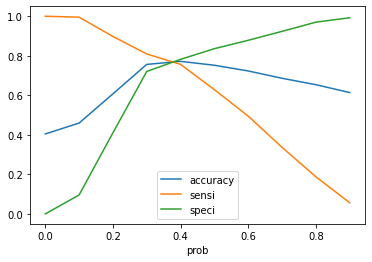

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [96]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Convertion_prob.map( lambda x: 1 if x > 0.4 else 0)

Y_train_pred_final.head()

,Potential_Convertion,Convertion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.356174,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.255079,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.171656,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.192987,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.674184,1,1,1,1,1,1,1,1,0,0,0,1


**6.7 : Finding the performance measures**

In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Potential_Convertion, Y_train_pred_final.final_predicted)

0.771770062606716

In [98]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Potential_Convertion, Y_train_pred_final.final_predicted )
confusion2

array([[2455,  684],
       [ 519, 1613]])

In [99]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7565666041275797

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.7820962089837528

In [102]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.2179037910162472


In [103]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7022202873313017


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8254875588433087


Precision and Recall

In [105]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(Y_train_pred_final.Potential_Convertion, Y_train_pred_final.predicted )
confusion

array([[2624,  515],
       [ 792, 1340]])

Precision
TP / TP + FP

In [106]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7223719676549866

Recall
TP / TP + FN

In [107]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6285178236397748

**6.8 : Making predictions on the test set**

In [119]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [130]:
X_test[col].head()

,Do Not Email,Total Time Spent on Website,Search,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Country_Kuwait,Country_Nigeria,Country_Qatar,Country_Saudi Arabia
7282,1,-0.684996,0,0,0,0,0,0,0,0
5149,1,-0.570723,0,0,0,0,0,0,0,0
5846,1,-0.607586,0,0,0,0,0,0,0,0
3599,1,-0.926442,0,0,0,0,0,0,0,0
4927,1,2.234477,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test)

In [132]:
Y_test_pred = res.predict(X_test_sm)
Y_test_pred[:10]

7282    0.213122
5149    0.234040
5846    0.227140
3599    0.173507
4927    0.854986
4672    0.211171
5224    0.218055
1444    0.825843
781     0.158441
9183    0.533659
dtype: float64

In [133]:
Y_test_pred[:10]

7282    0.213122
5149    0.234040
5846    0.227140
3599    0.173507
4927    0.854986
4672    0.211171
5224    0.218055
1444    0.825843
781     0.158441
9183    0.533659
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [135]:
# Let's see the head
Y_pred_1.head()

,0
7282,0.213122
5149,0.234040
5846,0.227140
3599,0.173507
4927,0.854986


In [136]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [137]:
# Putting Prospect ID to index
Y_test_df['Prospect ID'] = Y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending Y_test_df and Y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [140]:
# Renaming the column
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Convertion_prob'})

In [142]:
# Let's see the head of Y_pred_final
Y_pred_final.head()

,Converted,Prospect ID,Convertion_prob
0,0,7282,0.213122
1,0,5149,0.234040
2,0,5846,0.227140
3,0,3599,0.173507
4,1,4927,0.854986


In [154]:
Y_pred_final['final_predicted'] = Y_pred_final.Convertion_prob.map(lambda x: 1 if x > 0.42 else 0)

In [144]:
Y_pred_final.head()

,Converted,Prospect ID,Convertion_prob,final_predicted
0,0,7282,0.213122,0
1,0,5149,0.234040,0
2,0,5846,0.227140,0
3,0,3599,0.173507,0
4,1,4927,0.854986,1


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.7870739265161576

In [146]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
confusion2

array([[1129,  273],
       [ 208,  649]])

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7572928821470245

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.8052781740370899

**Step 7 : Generating the score variable**

In [156]:
Y_pred_final['Lead Score']= round(Y_pred_final['Convertion_prob']*100)
Y_pred_final

,Converted,Prospect ID,Convertion_prob,final_predicted,Lead Score
0,0,7282,0.213122,0,21.0
1,0,5149,0.234040,0,23.0
2,0,5846,0.227140,0,23.0
3,0,3599,0.173507,0,17.0
4,1,4927,0.854986,1,85.0
...,...,...,...,...,...
2254,1,3522,0.825843,1,83.0
2255,0,5114,0.182904,0,18.0
2256,0,2830,0.503567,1,50.0
2257,0,1726,0.223069,0,22.0
